In [1]:
train_dir = 'C:\\Users\\rajni\\OneDrive\\Desktop\\Test jupyter\\Railway Track fault Detection Updated\\Train'
val_dir   = 'C:\\Users\\rajni\\OneDrive\\Desktop\\Test jupyter\\Railway Track fault Detection Updated\\Validation'
test_dir  = 'C:\\Users\\rajni\\OneDrive\\Desktop\\Test jupyter\\Railway Track fault Detection Updated\\Test'

In [2]:
import os
train_defective_fnames = os.listdir(train_dir+'\\Defective' )
train_nondefective_fnames = os.listdir(train_dir+'\\Non defective')

# Show Dataset Images

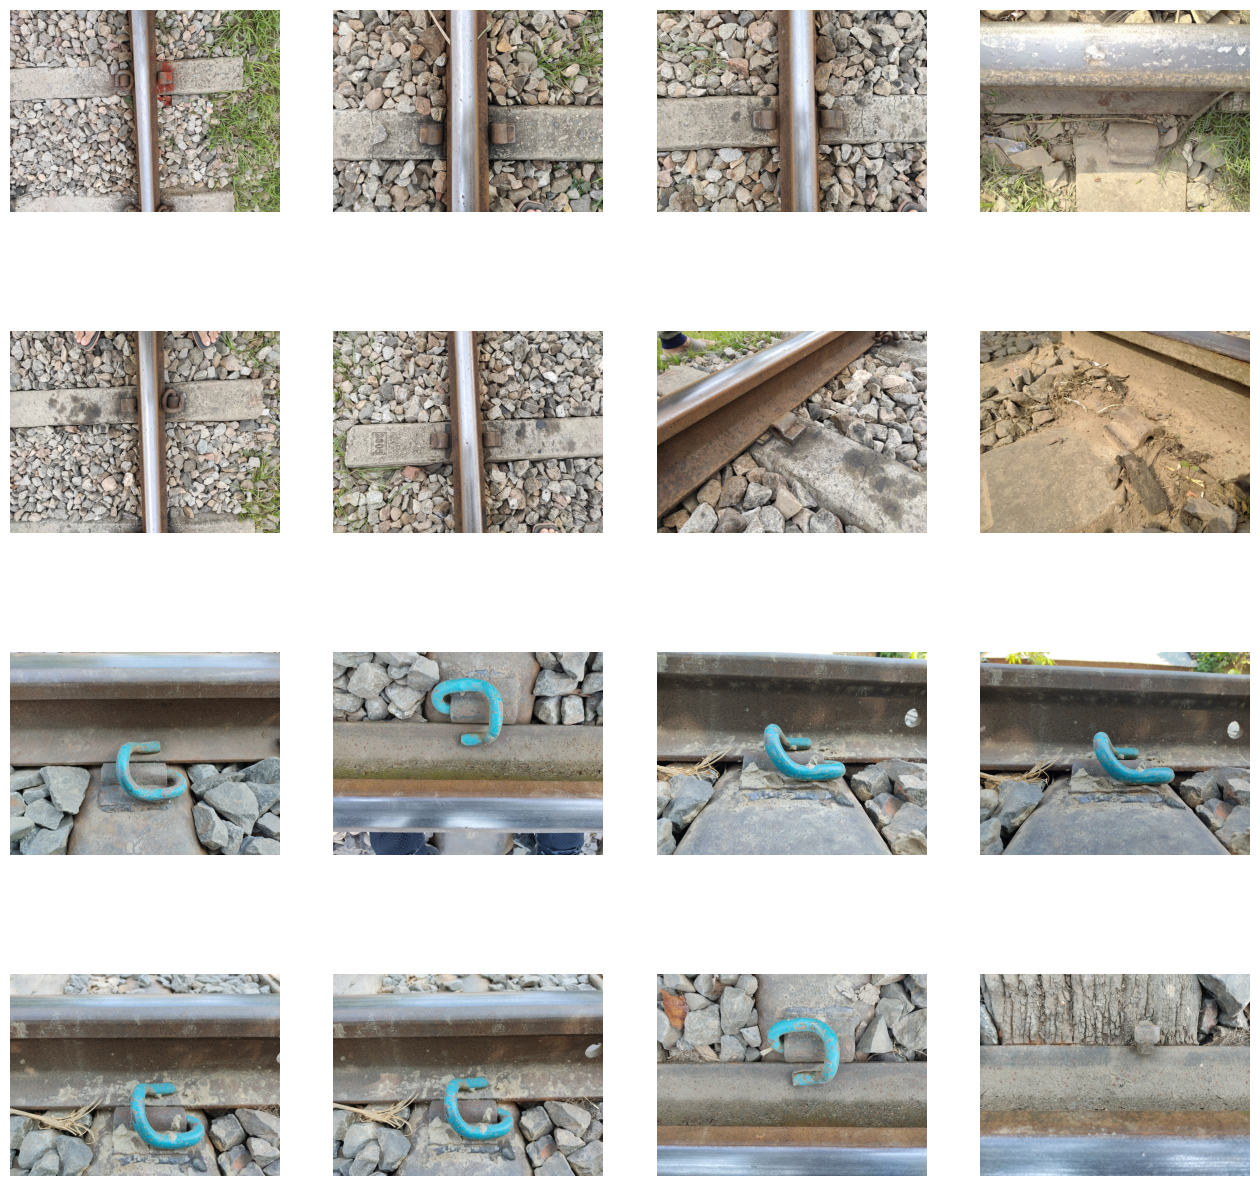

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 10x10 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_defective_pix = [os.path.join(train_dir+'/Defective', fname) 
                for fname in train_defective_fnames[pic_index-8:pic_index]]
next_nondefective_pix = [os.path.join(train_dir+'/Non defective', fname) 
                for fname in train_nondefective_fnames[pic_index-8:pic_index]]


for i, img_path in enumerate(next_defective_pix+next_nondefective_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

target_size=(300,300)
batch_size = 16

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',    
    shuffle=True,
    seed=42,
    class_mode='categorical')

Found 299 images belonging to 2 classes.


In [6]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,    
    class_mode='categorical')

Found 62 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,     
    class_mode=None)

Found 22 images belonging to 2 classes.


# BUILDING MODEL

In [8]:
num_classes = 2
input_shape = (300,300,3)

In [9]:
# Build Model
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import models, layers

base_model=ResNet50V2(input_shape=input_shape,weights='imagenet',include_top=False) 
base_model.trainable = False # freeze the base model (for transfer learning)

# add Fully-Connected Layers to Model
x=base_model.output
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)  # FC layer 
preds=layers.Dense(num_classes,activation='softmax')(x) #final layer with softmax activation

model=models.Model(inputs=base_model.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 75, 75, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 75, 75, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 75, 75, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 38, 38, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 38, 38, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 38, 38, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 38, 38, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 19, 19, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 19, 19, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 21, 21, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 19, 19, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 19, 19, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 19, 19, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 19, 19, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 21, 21, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 10, 10, 256)  589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_2_relu (Activatio  (None, 10, 10, 512)  0          ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 10, 10, 2048  1050624     ['conv5_block2_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv5_block2_out (Add)         (None, 10, 10, 2048  0           ['conv5_block1_out[0][0]',       
                                )                                 'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_blo

In [10]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# TRAINING MODEL

In [11]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VAL  =val_generator.n//val_generator.batch_size
STEP_SIZE_TEST =test_generator.n//test_generator.batch_size
num_epochs = 30

In [12]:
# Train Model
history = model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,epochs=num_epochs, validation_data=val_generator, validation_steps=STEP_SIZE_VAL) 
#, callbacks=[checkpoint])

Epoch 1/30
18/18 [==============================] - 63s 3s/step - loss: 0.5982 - accuracy: 0.7491 - val_loss: 0.6433 - val_accuracy: 0.6875
Epoch 2/30
18/18 [==============================] - 58s 3s/step - loss: 0.4551 - accuracy: 0.7527 - val_loss: 0.5319 - val_accuracy: 0.8125
Epoch 3/30
18/18 [==============================] - 58s 3s/step - loss: 0.3973 - accuracy: 0.8057 - val_loss: 0.3262 - val_accuracy: 0.8333
Epoch 4/30
18/18 [==============================] - 58s 3s/step - loss: 0.3343 - accuracy: 0.8587 - val_loss: 0.3543 - val_accuracy: 0.8125
Epoch 5/30
18/18 [==============================] - 58s 3s/step - loss: 0.4019 - accuracy: 0.8092 - val_loss: 0.3789 - val_accuracy: 0.8125
Epoch 6/30
18/18 [==============================] - 58s 3s/step - loss: 0.3149 - accuracy: 0.8551 - val_loss: 0.2891 - val_accuracy: 0.8542
Epoch 7/30
18/18 [==============================] - 60s 3s/step - loss: 0.3047 - accuracy: 0.8693 - val_loss: 0.2285 - val_accuracy: 0.8958
Epoch 8/30
18/18 [==

# SAVE MODEL

In [13]:
models.save_model(model, 'railway_track_resnet50v2.h5')

In [14]:
## load best model weights if using callback (save-best-only)
#model.load_weights("railtrack_resnet50v2.hdf5")

# EVALUATE MODEL

In [15]:
score = model.evaluate(test_generator, steps=STEP_SIZE_TEST) # with test dataset
print(score)

1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[0.0, 0.0]


# CONFUSION MATRIX

In [16]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

predY=model.predict(test_generator) # with validation dataset
y_pred = np.argmax(predY,axis=1)
y_actual = test_generator.classes
cm = confusion_matrix(y_actual, y_pred)
print(cm)

2/2 [==============================] - 6s 889ms/step
[[10  1]
 [ 2  9]]


In [17]:
# report confusion matrix
labels = ['Defective', 'Non Defective']
print(classification_report(y_actual, y_pred, target_names=labels))

               precision    recall  f1-score   support

    Defective       0.83      0.91      0.87        11
Non Defective       0.90      0.82      0.86        11

     accuracy                           0.86        22
    macro avg       0.87      0.86      0.86        22
 weighted avg       0.87      0.86      0.86        22



# TRAINING HISTORY

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


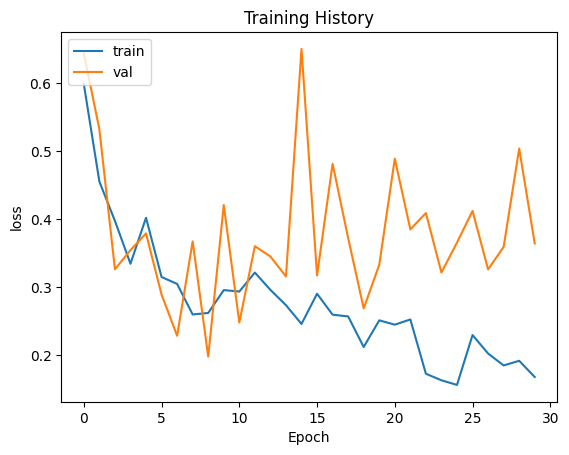

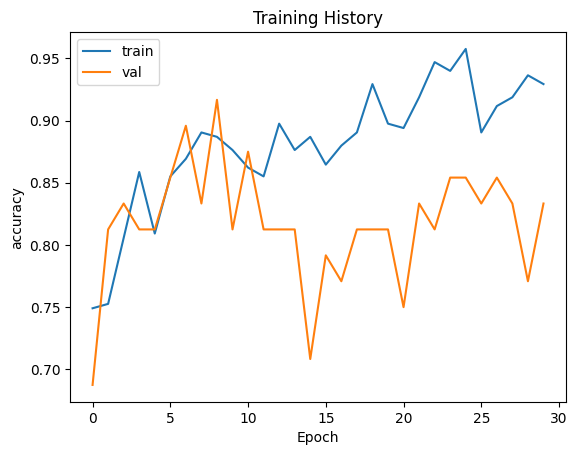

In [18]:






# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,val): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[val])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')